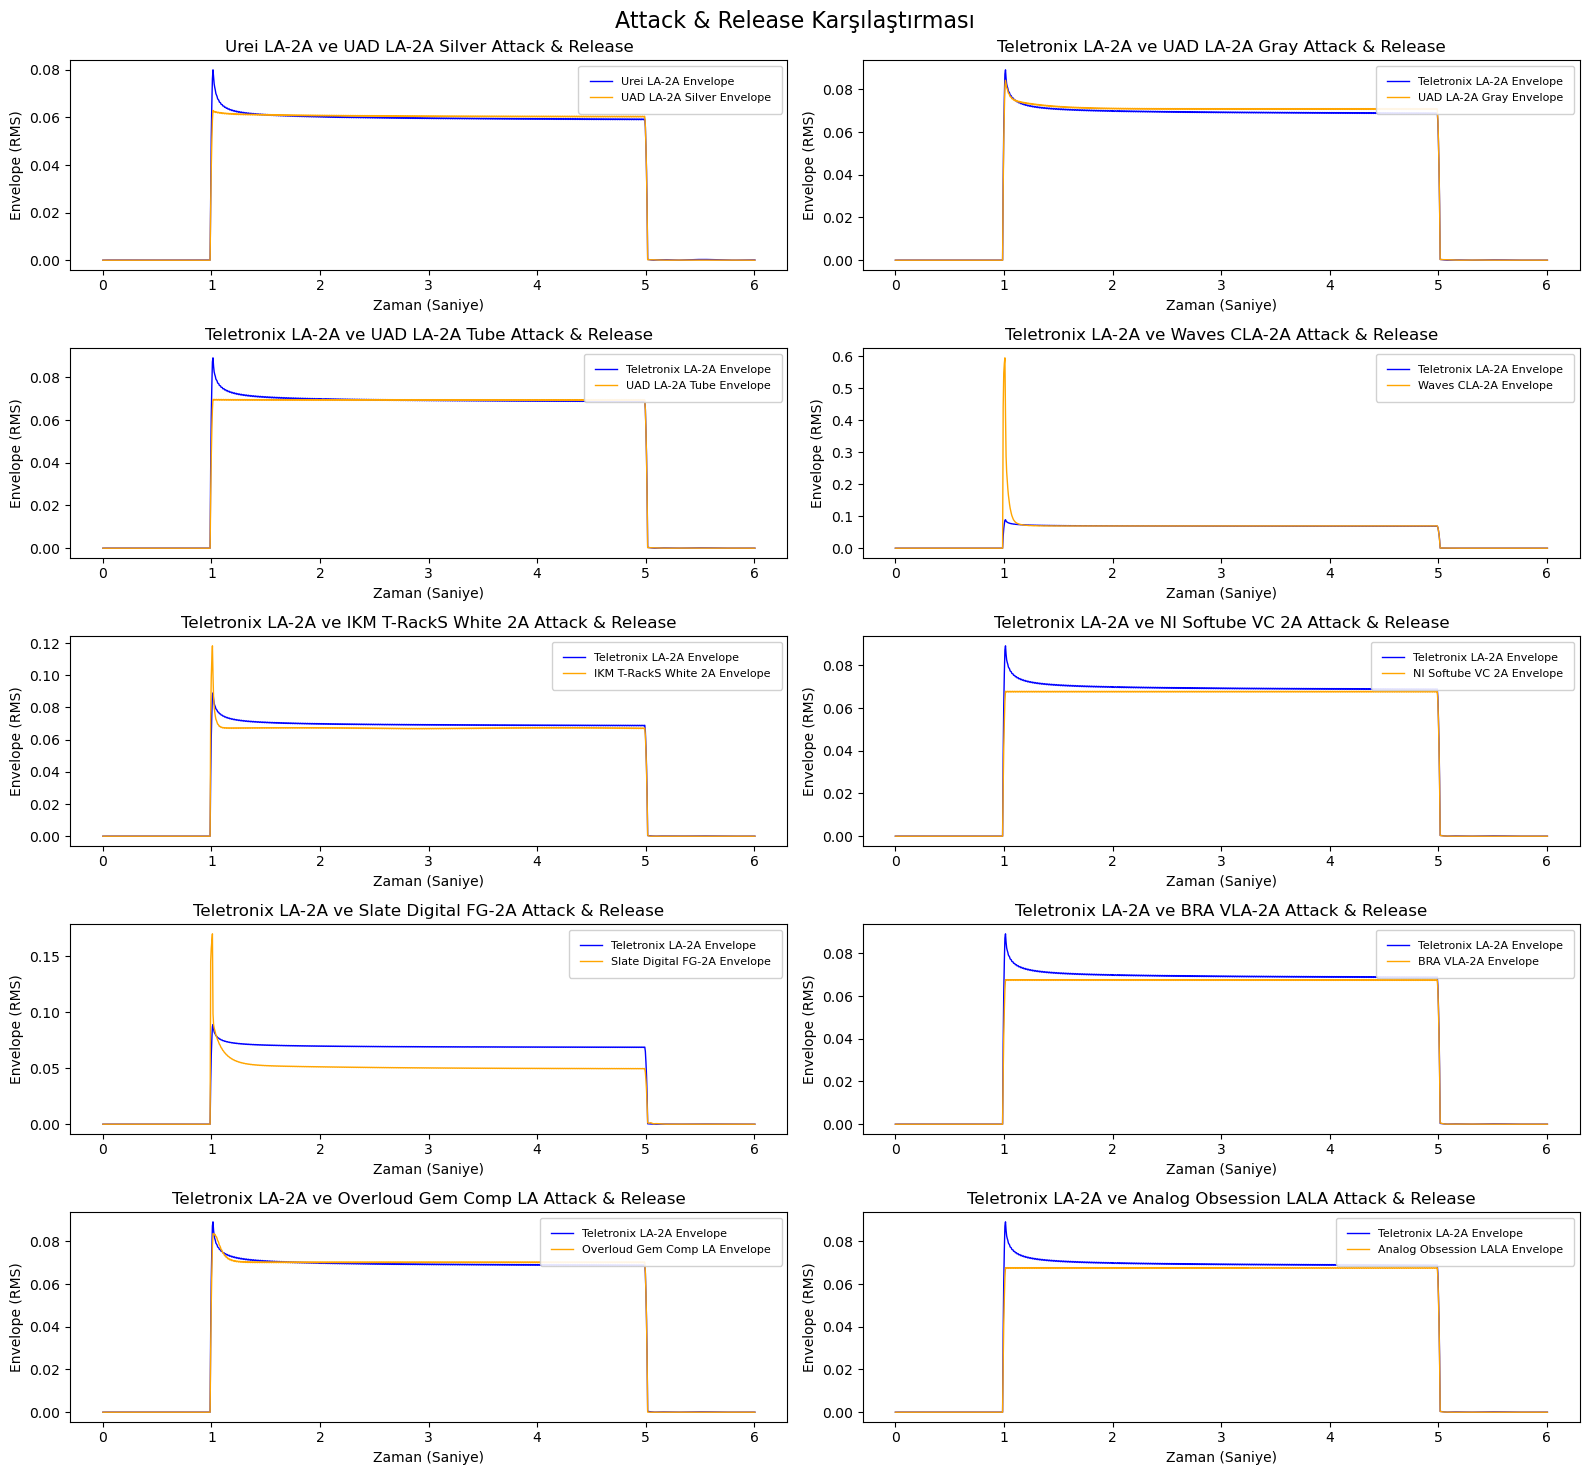

In [3]:
# Envelope (zarf) karakteristiklerini, yani sinyalin attack (çıkış süresi) ve release (iniş süresi) davranışlarını karşılaştırıyor.

# LA-2A gibi kompresörlerde, zarfın davranışı belirli bir frekansta nasıl tepki verdiğiyle ilgilidir. 
# Sabit frekans sinüs dalgası, cihazın frekansa bağlı dinamik işleme özelliklerini izole etmek için idealdir.

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_1_khz_sine.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_1_khz_sine.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Zarf hesaplama fonksiyonu
def compute_envelope(signal, frame_size, hop_length):
    rms = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_length)[0]
    return rms

# Parametreler
frame_size = 2048
hop_length = 512

# Referans dosyaları yükleme
teletronix_sound, sr_teletronix = librosa.load(audio_files[0], sr=None)
urei_sound, sr_urei = librosa.load(audio_files[1], sr=None)

# Zarf hesaplama
teletronix_envelope = compute_envelope(teletronix_sound, frame_size, hop_length)
urei_envelope = compute_envelope(urei_sound, frame_size, hop_length)

# Karşılaştırılacak dosyalar
comparison_pairs = [
    (audio_files[3], "UAD LA-2A Silver", urei_envelope, "Urei LA-2A"),
    (audio_files[2], "UAD LA-2A Gray", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[4], "UAD LA-2A Tube", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[5], "Waves CLA-2A", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[6], "IKM T-RackS White 2A", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[7], "NI Softube VC 2A", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[8], "Slate Digital FG-2A", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[9], "BRA VLA-2A", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[10], "Overloud Gem Comp LA", teletronix_envelope, "Teletronix LA-2A"),
    (audio_files[11], "Analog Obsession LALA", teletronix_envelope, "Teletronix LA-2A"),
]

# Grafik düzeni
n_graphs = len(comparison_pairs)
n_cols = 2
n_rows = (n_graphs + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

# Grafik oluşturma
for idx, (file, label, ref_envelope, ref_label) in enumerate(comparison_pairs):
    # Ses dosyasını yükle
    sound, sr = librosa.load(file, sr=None)
    envelope = compute_envelope(sound, frame_size, hop_length)
    
    # Zarfın zaman eksenini hesaplama
    ref_time = np.linspace(0, len(ref_envelope) * hop_length / sr_teletronix, num=len(ref_envelope))
    time = np.linspace(0, len(envelope) * hop_length / sr, num=len(envelope))
    
    # Grafik çizimi
    ax = axes[idx]
    ax.plot(ref_time, ref_envelope, label=f"{ref_label} Envelope", color='blue', linewidth=1)
    ax.plot(time, envelope, label=f"{label} Envelope", color='orange', linewidth=1)
    
    # Başlık, eksen bilgileri ve gösterge
    ax.set_title(f"{ref_label} ve {label} Attack & Release")
    ax.set_xlabel("Zaman (Saniye)")
    ax.set_ylabel("Envelope (RMS)")
    ax.legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)

# Boş alt eksenleri gizleme
for idx in range(n_graphs, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Attack & Release Karşılaştırması", fontsize=16)
plt.show()
